In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

/export/scratch1/hendriks/miniconda3/envs/odl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Start a tensorflow session
session = tf.InteractiveSession()

# Set the random seed to enable reproducible code
np.random.seed(0)

In [3]:
mnist = input_data.read_data_sets('MNIST_data')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


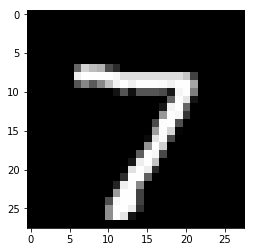

In [4]:
plt.imshow(mnist.test.images[0].reshape(28,-1),cmap='Greys_r');
plt.show()

In [5]:
batch = mnist.test.next_batch(10000)
test_images = batch[0].reshape([-1, 28, 28, 1])
test_labels = batch[1]

def evaluate(result_tensor, data_placeholder):
    """Evaluate a reconstruction method.

    Parameters
    ----------
    result_tensor : `tf.Tensor`, shape (None,)
        The tensorflow tensor containing the result of the classification.
    data_placeholder : `tf.Tensor`, shape (None, 28, 28, 1) or (None, 784)
        The tensorflow tensor containing the input to the classification operator.

    Returns
    -------
    MSE : float
        Mean squared error of the reconstruction.
    """
    feed_images = np.reshape(test_images, [-1, *data_placeholder.shape[1:]])
    result = result_tensor.eval(
        feed_dict={data_placeholder: feed_images})

    return np.mean(result == test_labels)

In [6]:
toh = tf.one_hot([0, 1, 2], depth=3)
toh.eval()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]], dtype=float32)

In [8]:
with tf.name_scope('elementary_network'):
    # Create a placeholder for our input data (no computation is done here)
    X = tf.placeholder(shape=(None, 784), dtype=tf.float32, name="X")
    
    # Create the parameters (weight, bias) of the model
    weights = tf.Variable(tf.random_normal((784, 10)), name="weights")
    bias = tf.Variable(tf.zeros((10)), name="bias")
    
    # Compute the probabilities (this is all lazy, no computations are actually performed)
    lin = tf.matmul(X, weights) + bias
    elin = tf.exp(lin)
    Z = tf.reduce_sum(elin, axis=1, keep_dims=True)
    prob = elin / Z
    log_prob = tf.log(prob)

In [10]:
with tf.name_scope("elementary_loss"):
    labels = tf.placeholder(shape=(None,), dtype=tf.int32)
    determ = tf.one_hot(labels, depth=10)
    loss = -tf.reduce_mean(determ*log_prob)

In [11]:
with tf.name_scope("elementary_training"):
    learning_rate = .1
    batch_size = 128

    variables = [weights, bias]
    gradients = tf.gradients(loss, variables)
    update_ops = [var.assign(var - learning_rate*grad) 
                  for var, grad in zip(variables, gradients)]

In [12]:
init = tf.global_variables_initializer().run()

In [14]:
for i in range(100000):
    images_, labels_ = mnist.train.next_batch(batch_size)
    session.run(update_ops, 
                feed_dict={labels:labels_, X:images_})
    
    if i % 1000 == 0:
        print("{:.1f}%, ".format(evaluate(tf.argmax(log_prob, axis=1), X)*100), end="")

81.3%, 81.9%, 82.4%, 82.9%, 83.3%, 83.7%, 84.1%, 84.4%, 84.6%, 84.9%, 85.1%, 85.3%, 85.4%, 85.5%, 85.9%, 86.0%, 86.2%, 86.3%, 86.4%, 86.6%, 86.6%, 86.8%, 86.9%, 87.0%, 87.1%, 87.2%, 87.2%, 87.3%, 87.5%, 87.6%, 87.7%, 87.8%, 87.8%, 87.9%, 87.9%, 88.0%, 88.0%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 9.8%, 